# **Imports:**
This contains all the packages required in the code.

**CAVEAT**: Before running the code, make sure that the dataset 'ai2020.csv' is uploaded in the runtime. This is because runtime files are temporary, they get removed once runtime is disconnected.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

# **Data and feature analysis:**

### Descriptive statistics
We will see how our data looks, what features it has. Further we simply use the describe function of pandas dataframe, to get the mean, average, max and min statistics.

In [2]:
df=pd.read_csv('ai2020.csv')
df.head()

,UID,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,0,0,0,0,0
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,0,0,0,0,0
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,0,0,0,0,0
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,0,0,0,0,0
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,0,0,0,0,0


In [3]:
# summary of statistics
summary_stats = df.describe()
print(summary_stats)

               UID  Air temperature [K]  Process temperature [K]  \
count  10000.00000         10000.000000             10000.000000   
mean    5000.50000           300.004930               310.005560   
std     2886.89568             2.000259                 1.483734   
min        1.00000           295.300000               305.700000   
25%     2500.75000           298.300000               308.800000   
50%     5000.50000           300.100000               310.100000   
75%     7500.25000           301.500000               311.100000   
max    10000.00000           304.500000               313.800000   

       Rotational speed [rpm]   Torque [Nm]  Tool wear [min]  Machine failure  \
count            10000.000000  10000.000000     10000.000000     10000.000000   
mean              1538.776100     39.986910       107.951000         0.033900   
std                179.284096      9.968934        63.654147         0.180981   
min               1168.000000      3.800000         0.000000   

### Distributions of features
Here, we handle the infinite values, by replacing them with NaN in the dataframe. After that, we plot histograms of each feature with number of products.

Then we have a density plot between air temperature and process temperature.

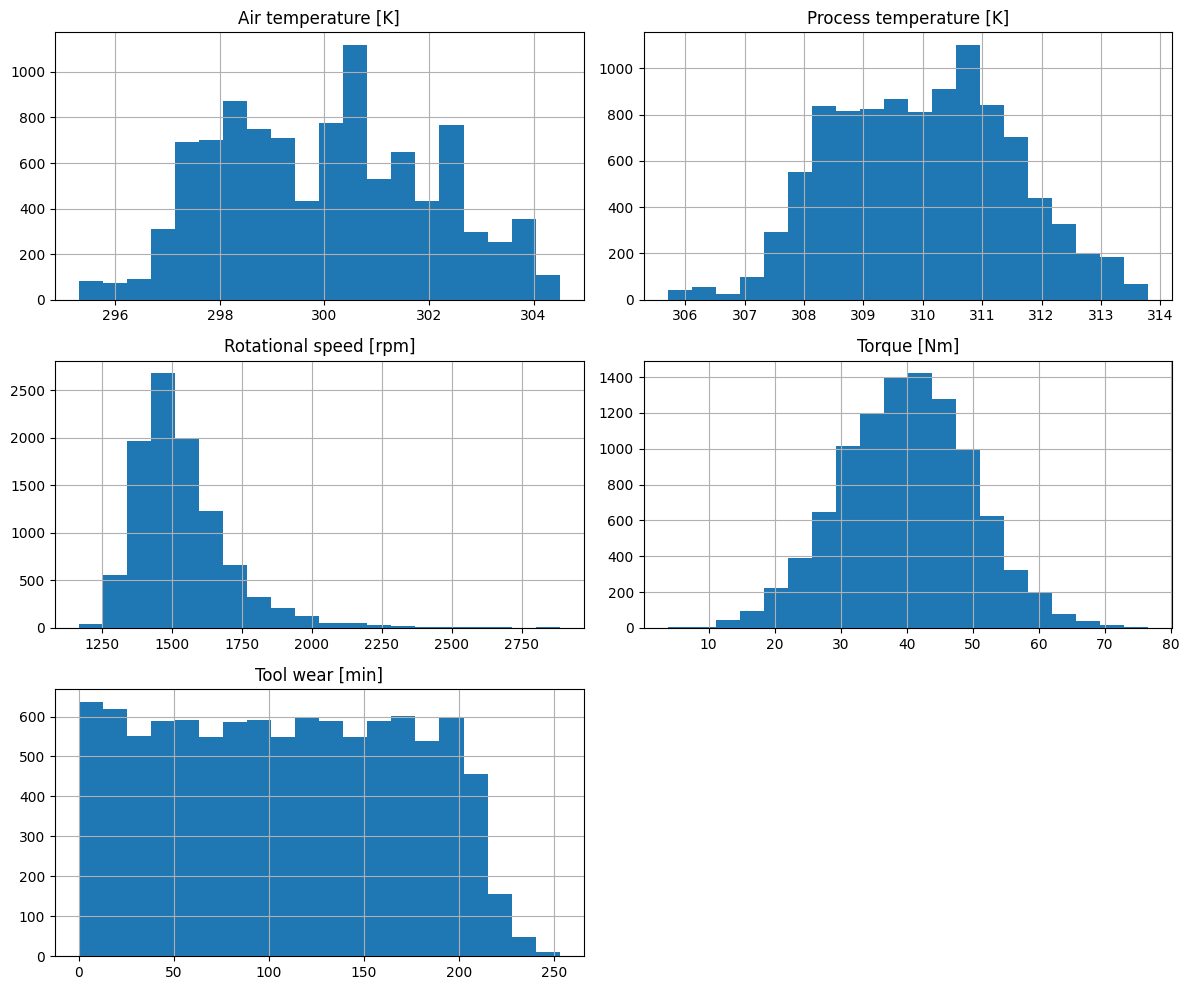

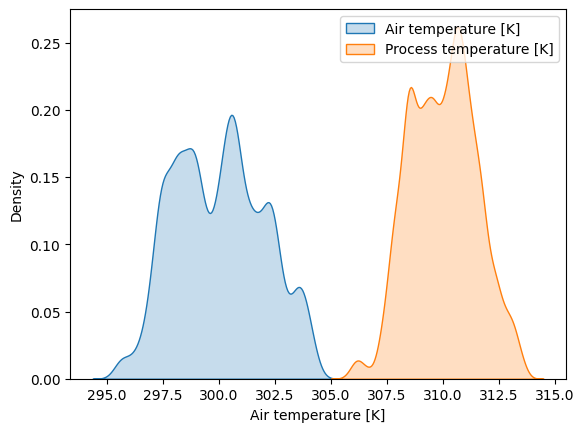

In [4]:
import numpy as np

# replace infinite values with NaN
df.replace([np.inf, -np.inf], np.nan, inplace=True)

# drop rows with NaN values
df.dropna(inplace=True)

# histograms
df[['Air temperature [K]', 'Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]']].hist(figsize=(12, 10), bins=20)
plt.tight_layout()
plt.show()

# density plots
sns.kdeplot(df['Air temperature [K]'], fill=True)
sns.kdeplot(df['Process temperature [K]'], fill=True)
plt.legend(['Air temperature [K]', 'Process temperature [K]'])
plt.show()


### Boxplots for features
Here, we plot the boxplots according to type (L,H,M) and Machine failure values (0,1).

They provide us any outliers if any, which are none as observed.

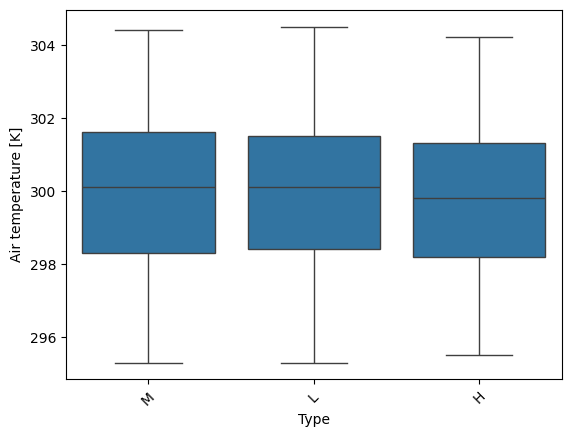

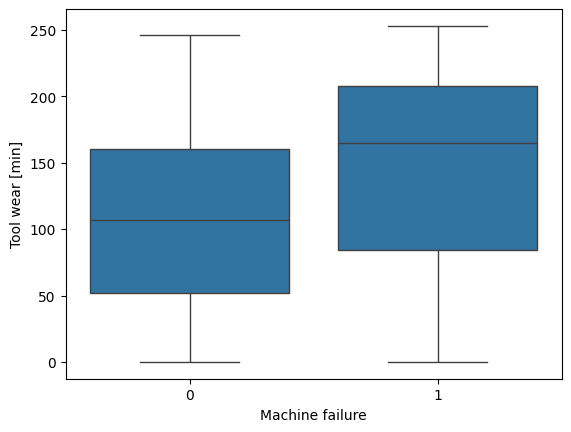

In [5]:
# boxplot for numerical features by 'Type'
sns.boxplot(x='Type', y='Air temperature [K]', data=df)
plt.xticks(rotation=45)
plt.show()

# boxplot grouped by 'Machine failure'
sns.boxplot(x='Machine failure', y='Tool wear [min]', data=df)
plt.show()

### Correlation Heatmap
This heatmap provides the relation between all pairs of features. As seen from the heatmap, there is negative correlation between rpm and torque, which can be seen by (-0.88).

Also there is a strong positive correlation between process temparature and air temparature (+0.88).

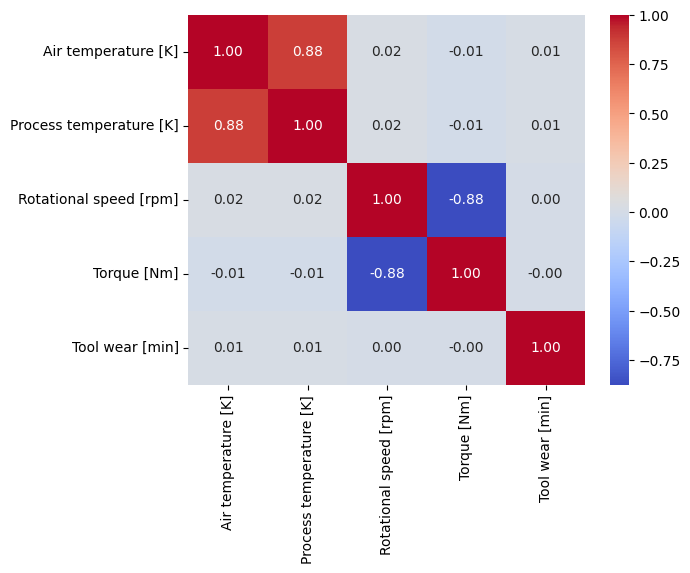

In [6]:
correlation_matrix = df[['Air temperature [K]', 'Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.show()

### Scatter-plots
For "Torque" and "Rotational speed" we have one sctterplot. another one is for "air temperature" and "process temparature".

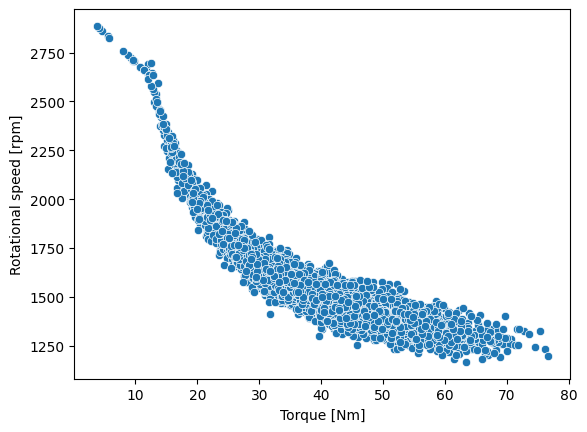

In [7]:
sns.scatterplot(x='Torque [Nm]', y='Rotational speed [rpm]', data=df)
plt.show()

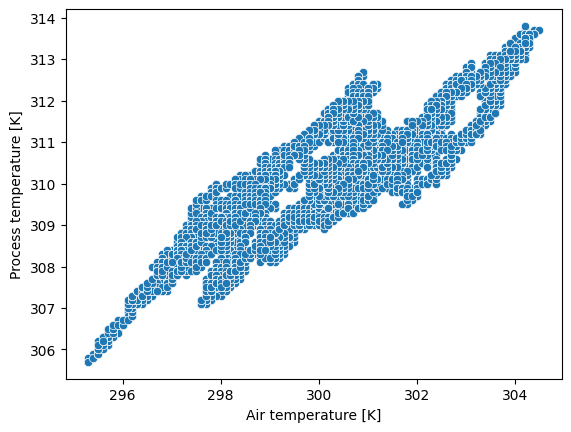

In [8]:
sns.scatterplot(x='Air temperature [K]', y='Process temperature [K]', data=df)
plt.show()

### Barcharts
To know the number of each type of product and also which products have machine failure value and which don't.

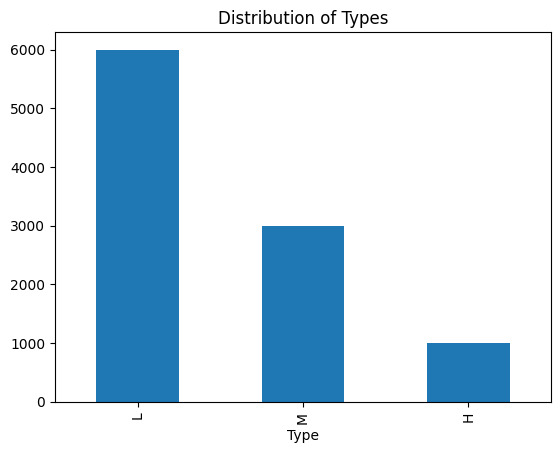

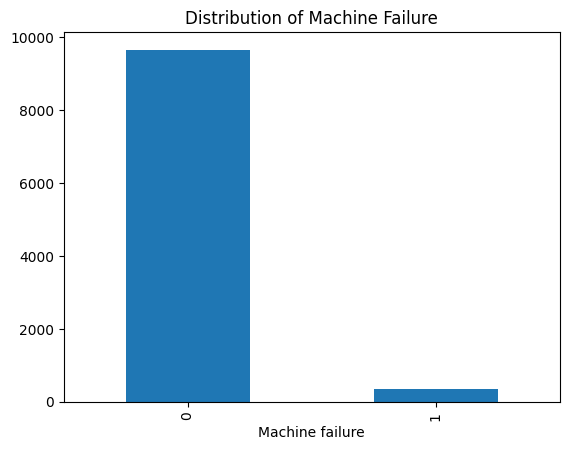

In [9]:
# for categorical features
df['Type'].value_counts().plot(kind='bar')
plt.title('Distribution of Types')
plt.show()

# for Machine failure feature (target value)
df['Machine failure'].value_counts().plot(kind='bar')
plt.title('Distribution of Machine Failure')
plt.show()

### Paiplots
This helps to see which pair of features are related and how. This is also achieved by correlation matrix, but this is visual rather than mathematical.

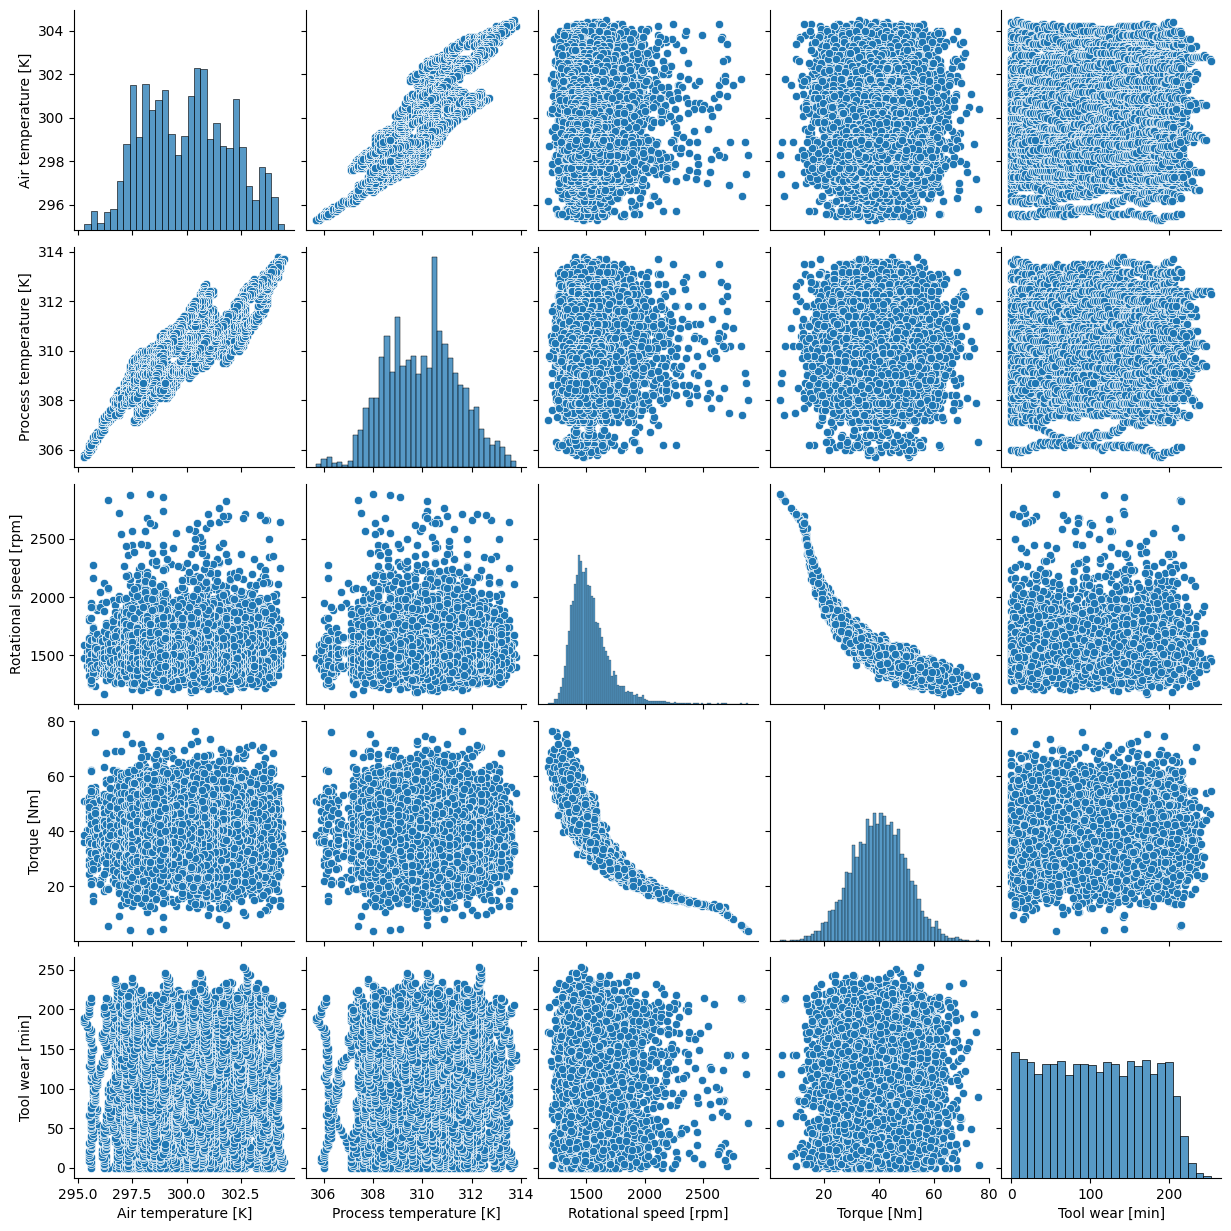

In [10]:
sns.pairplot(df[['Air temperature [K]', 'Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]']])
plt.show()

### Categorical analysis
Frequency by types is counted here.

Type
L    6000
M    2997
H    1003
Name: count, dtype: int64


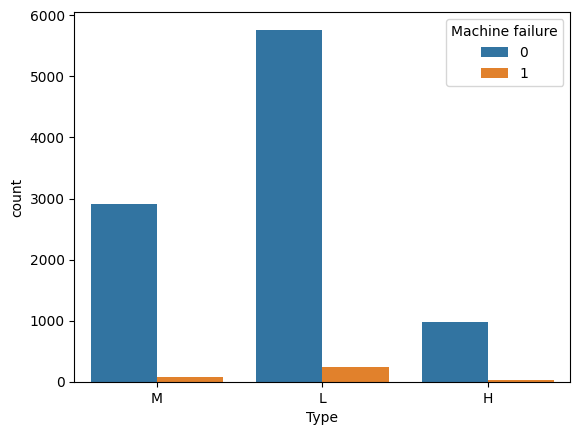

In [11]:
# each type
type_counts = df['Type'].value_counts()
print(type_counts)

# Machine failure by Type
sns.countplot(x='Type', hue='Machine failure', data=df)
plt.show()

### Feature engineering
Creating new feature may bring in new feature relations.

Except for torque and rpm related features, other features are not correlated with this feature, as seen from the heatmap.

In [12]:
# Creating a new feature: Torque per rpm
df['Torque per rpm'] = df['Torque [Nm]'] / df['Rotational speed [rpm]']
print(df[['Torque per rpm']].head())

   Torque per rpm
0        0.027595
1        0.032884
2        0.032977
3        0.027565
4        0.028409


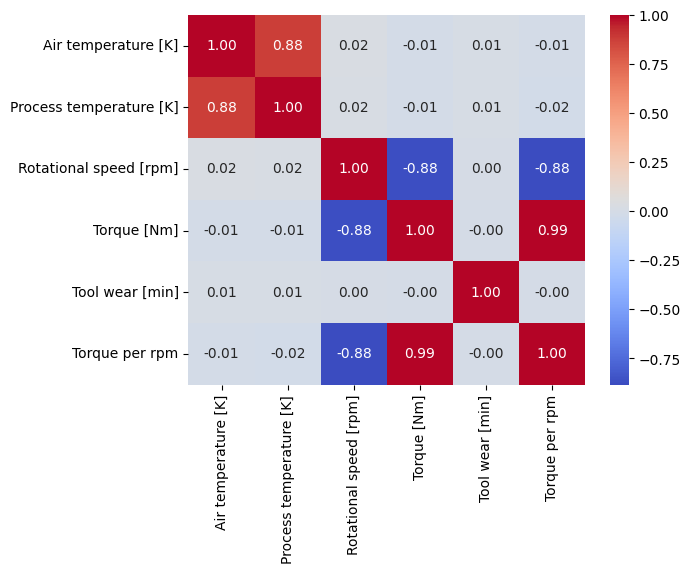

In [13]:
# Compute and visualize correlation matrix
correlation_matrix = df[['Air temperature [K]', 'Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]', 'Torque per rpm']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.show()

### Missing values
Let us analyse the missing values if any, but the dataset is clean.

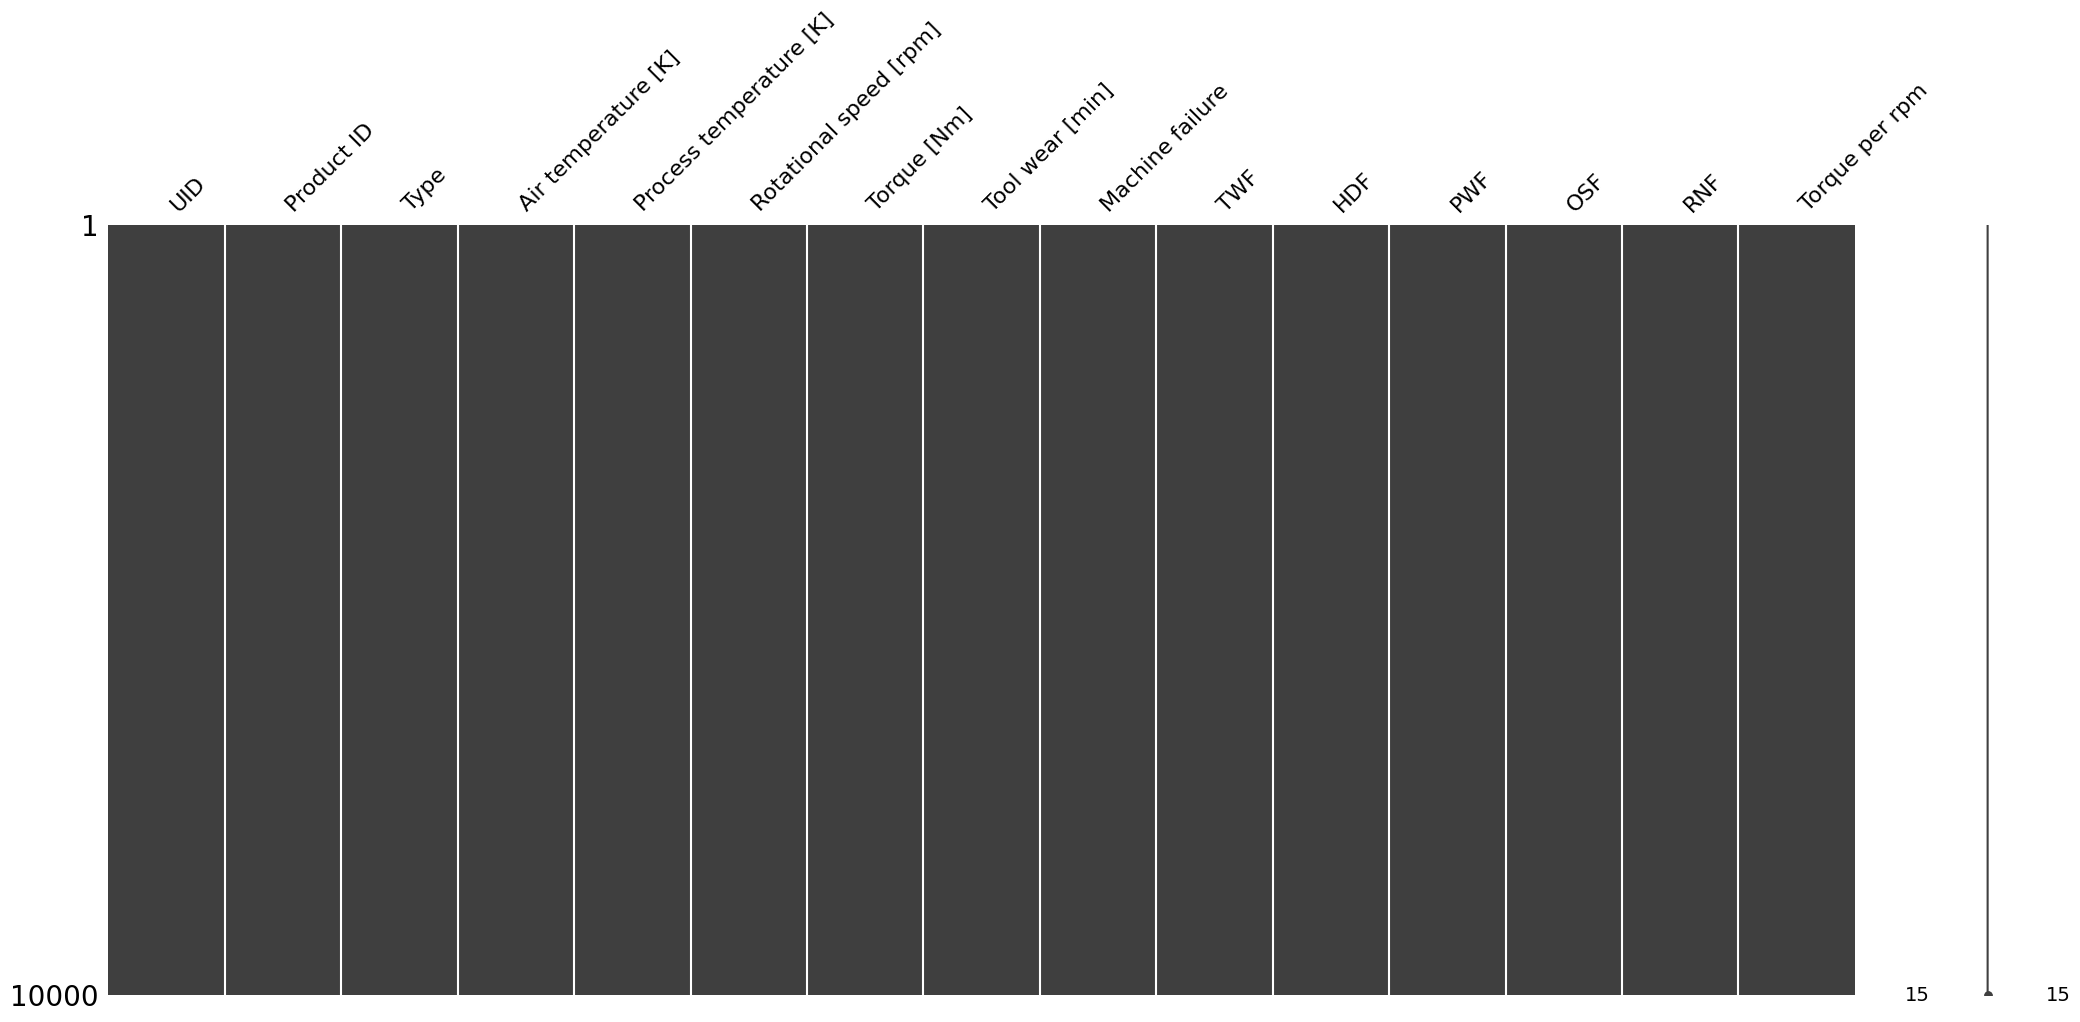

UID                        0
Product ID                 0
Type                       0
Air temperature [K]        0
Process temperature [K]    0
Rotational speed [rpm]     0
Torque [Nm]                0
Tool wear [min]            0
Machine failure            0
TWF                        0
HDF                        0
PWF                        0
OSF                        0
RNF                        0
Torque per rpm             0
dtype: int64


In [14]:
import missingno as msno

msno.matrix(df)
plt.show()

# summary
print(df.isnull().sum())

### Feature importance
This calculates the importance of fetaures.

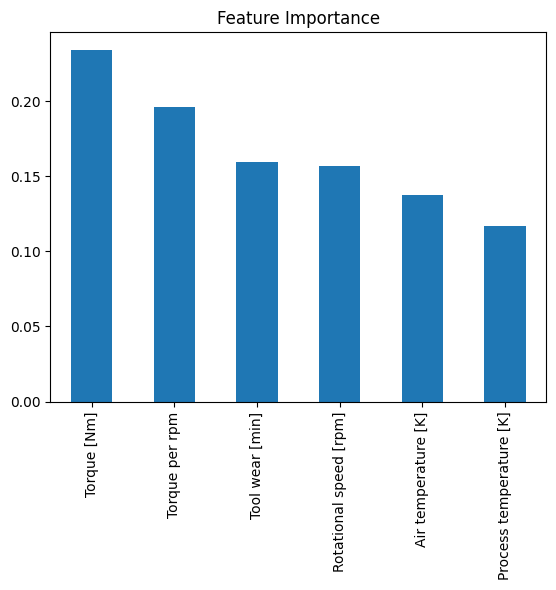

In [15]:
from sklearn.ensemble import RandomForestClassifier

# 'Machine failure' is target variable and other columns are features here
X = df[['Air temperature [K]', 'Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]', 'Torque per rpm']]
y = df['Machine failure']

model = RandomForestClassifier()
model.fit(X, y)

# feature importance
importances = model.feature_importances_
features = X.columns
feature_importance = pd.Series(importances, index=features).sort_values(ascending=False)

feature_importance.plot(kind='bar')
plt.title('Feature Importance')
plt.show()

# **Dataset creation - training and test set split:**

First normalize the values and handle categorical features.

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder

In [17]:
# convert 'Product ID' into quality variants by extracting the first letter
df['Product_Quality'] = df['Product ID'].apply(lambda x: x[0])

# drop 'Product ID' as it is no longer needed
df = df.drop(columns=['Product ID', 'UID'])

# label encode categorical features
label_encoder = LabelEncoder()
df['Type'] = label_encoder.fit_transform(df['Type'])
df['Product_Quality'] = label_encoder.fit_transform(df['Product_Quality'])

# features and target definition
X = df.drop(columns=['Machine failure', 'TWF', 'HDF', 'PWF', 'OSF', 'RNF'])
y = df['Machine failure']

# standardization
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [18]:
# training and testing dataset splitting (80-20)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# **Model training and performance evaluation:**

In [19]:
from sklearn.metrics import classification_report, accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.cluster import KMeans
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt

**Logistic regression:**

In [20]:
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
y_pred_log = log_reg.predict(X_test)

# evaluate
print("logistic regression accuracy:", accuracy_score(y_test, y_pred_log))
print(classification_report(y_test, y_pred_log))

logistic regression accuracy: 0.9725
              precision    recall  f1-score   support

           0       0.98      0.99      0.99      1939
           1       0.61      0.28      0.38        61

    accuracy                           0.97      2000
   macro avg       0.79      0.64      0.68      2000
weighted avg       0.97      0.97      0.97      2000



**Random forest classifier:**

In [21]:
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

# evaluate
print("random forest accuracy:", accuracy_score(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))

random forest accuracy: 0.984
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      1939
           1       0.87      0.56      0.68        61

    accuracy                           0.98      2000
   macro avg       0.93      0.78      0.84      2000
weighted avg       0.98      0.98      0.98      2000



**Support vector classifier:**

In [22]:
svc = SVC(kernel='linear')
svc.fit(X_train, y_train)
y_pred_svc = svc.predict(X_test)

# evaluate
print("SVC accuracy:", accuracy_score(y_test, y_pred_svc))
print(classification_report(y_test, y_pred_svc))

SVC accuracy: 0.9695
              precision    recall  f1-score   support

           0       0.97      1.00      0.98      1939
           1       0.00      0.00      0.00        61

    accuracy                           0.97      2000
   macro avg       0.48      0.50      0.49      2000
weighted avg       0.94      0.97      0.95      2000



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


**Gradient boosting classifier:**

In [23]:
gb = GradientBoostingClassifier()
gb.fit(X_train, y_train)
y_pred_gb = gb.predict(X_test)

# evaluate
print("gradient boosting accuracy:", accuracy_score(y_test, y_pred_gb))
print(classification_report(y_test, y_pred_gb))

gradient boosting accuracy: 0.9815
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      1939
           1       0.79      0.54      0.64        61

    accuracy                           0.98      2000
   macro avg       0.89      0.77      0.82      2000
weighted avg       0.98      0.98      0.98      2000



**K-means clustering:**

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


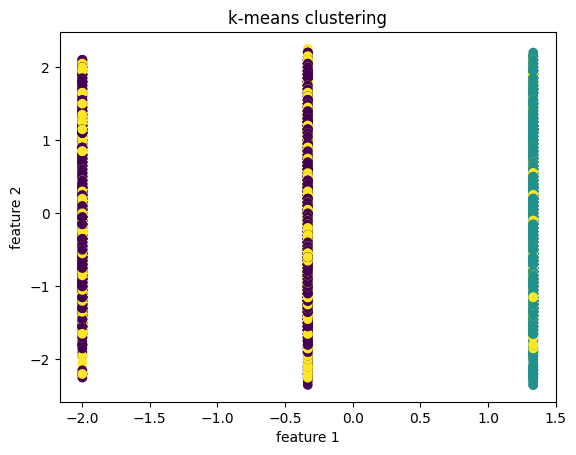

cluster centers:
 [[-0.59338142 -0.02483059 -0.01538505 -0.5254853   0.55790542  0.00804462
   0.55556763 -0.59338142]
 [ 1.33388944  0.00155546 -0.00264298 -0.28501355  0.23869353 -0.01804228
   0.23377672  1.33388944]
 [-0.27905534  0.03937483  0.02779004  1.13240467 -1.14214556  0.00374409
  -1.13367474 -0.27905534]]


In [24]:
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X_scaled)

# add cluster labels to dataset
df['Cluster'] = kmeans.labels_

# visualize clusters using PCA components
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=kmeans.labels_, cmap='viridis')
plt.title('k-means clustering')
plt.xlabel('feature 1')
plt.ylabel('feature 2')
plt.show()

# cluster centroids
print("cluster centers:\n", kmeans.cluster_centers_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` ex

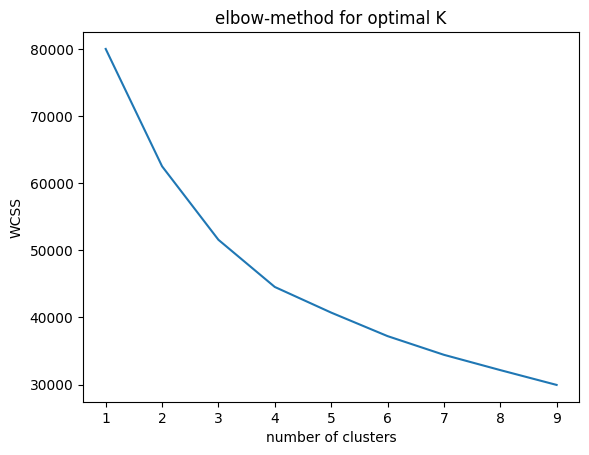

In [25]:
# elbow-method to find optimal k
wcss = []
for i in range(1, 10):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 10), wcss)
plt.title('elbow-method for optimal K')
plt.xlabel('number of clusters')
plt.ylabel('WCSS')
plt.show()

**K-nearest neighbors:**

In [26]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)

# evaluate
print("KNN accuracy:", accuracy_score(y_test, y_pred_knn))
print(classification_report(y_test, y_pred_knn))

KNN accuracy: 0.9775
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      1939
           1       0.83      0.33      0.47        61

    accuracy                           0.98      2000
   macro avg       0.91      0.66      0.73      2000
weighted avg       0.97      0.98      0.97      2000



# **Cross-validation reports:**

In [27]:
from sklearn.model_selection import StratifiedKFold, cross_val_score
# number of folds for cross-validation
n_folds = 5
skf = StratifiedKFold(n_splits=n_folds)

In [28]:
# logistic regression with cross-validation
log_reg = LogisticRegression()
log_reg_cv_scores = cross_val_score(log_reg, X_scaled, y, cv=skf, scoring='accuracy')

print("logistic regression CV accuracy scores:", log_reg_cv_scores)
print("logistic regression CV accuracy mean:", np.mean(log_reg_cv_scores))

logistic regression CV accuracy scores: [0.971  0.9665 0.958  0.972  0.969 ]
logistic regression CV accuracy mean: 0.9673


In [29]:
# random forest with cross-validation
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf_cv_scores = cross_val_score(rf, X_scaled, y, cv=skf, scoring='accuracy')

print("random forest CV accuracy scores:", rf_cv_scores)
print("random forest CV accuracy mean:", np.mean(rf_cv_scores))

random forest CV accuracy scores: [0.9785 0.9735 0.5515 0.9725 0.982 ]
random forest CV accuracy mean: 0.8916000000000001


In [30]:
# support vector with cross-validation
svc = SVC(kernel='linear')
svc_cv_scores = cross_val_score(svc, X_scaled, y, cv=skf, scoring='accuracy')

print("SVC CV accuracy scores:", svc_cv_scores)
print("SVC CV accuracy mean:", np.mean(svc_cv_scores))

SVC CV accuracy scores: [0.9665 0.966  0.966  0.966  0.966 ]
SVC CV accuracy mean: 0.9661000000000002


In [31]:
# gradient boosting with cross-validation
gb = GradientBoostingClassifier()
gb_cv_scores = cross_val_score(gb, X_scaled, y, cv=skf, scoring='accuracy')

print("gradient boosting CV accuracy scores:", gb_cv_scores)
print("gradient boosting CV accuracy mean:", np.mean(gb_cv_scores))

gradient boosting CV accuracy scores: [0.9765 0.9735 0.58   0.976  0.982 ]
gradient boosting CV accuracy mean: 0.8976000000000001


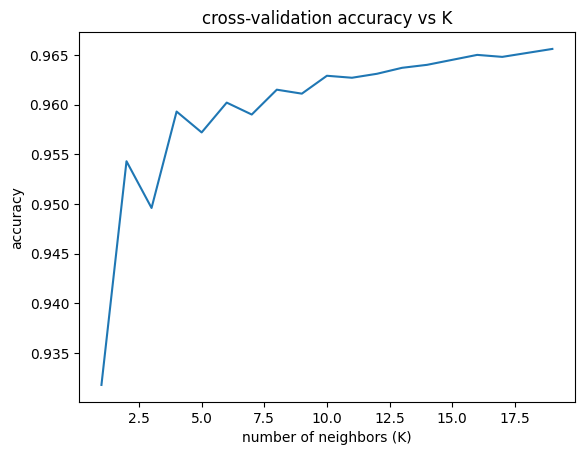

In [32]:
# KNN with cross-validation
neighbors = range(1, 20)
cv_scores = [cross_val_score(KNeighborsClassifier(n_neighbors=n), X_scaled, y, cv=5, scoring='accuracy').mean() for n in neighbors]

# cross-validated accuracy against k
plt.plot(neighbors, cv_scores)
plt.title('cross-validation accuracy vs K')
plt.xlabel('number of neighbors (K)')
plt.ylabel('accuracy')
plt.show()

# **Hyperparameter tuning:**

### Grid search CV:

In [33]:
from sklearn.model_selection import GridSearchCV

# define model (say rf, as it has a good accuracy of 98%)
model = RandomForestClassifier()

# define hyperparameters
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# initialize GridSearchCV
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)

grid_search.fit(X_train, y_train)

print("best parameters:", grid_search.best_params_)
print("best score:", grid_search.best_score_)

Fitting 5 folds for each of 81 candidates, totalling 405 fits
best parameters: {'max_depth': 30, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 100}
best score: 0.98125


### Randomized search CV:

In [34]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

model = RandomForestClassifier()

param_distributions = {
    'n_estimators': randint(100, 500),
    'max_depth': randint(10, 50),
    'min_samples_split': randint(2, 10),
    'min_samples_leaf': randint(1, 4)
}

random_search = RandomizedSearchCV(estimator=model, param_distributions=param_distributions, n_iter=50, cv=5, n_jobs=-1, verbose=2, random_state=42)

random_search.fit(X_train, y_train)

print("Best Parameters:", random_search.best_params_)
print("Best Score:", random_search.best_score_)

Fitting 5 folds for each of 50 candidates, totalling 250 fits
Best Parameters: {'max_depth': 41, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 212}
Best Score: 0.9807500000000001


# **Results:**
In this section, we will summarize all our results and the in-depth analysis done on this dataset.
1. **Section 1:** We thoroughly put forth the descriptive statistics, distribution of various features, boxplots, correlation matrix, scatterplots, and pairplots to visualise them. Further we have done categorical analysis, to understand what categorical variables are present in our data, and feature engineering. Finally we present missing value statistics and feature importance.
2. **Section 2:** It involves dataset creation and splitting it up into training and testing data. It is done using numpy and pandas dataframes. We standardize our data, define target variable and features, and drop unnecesary columns.
3. **Section 3:** This presents the model training, with logistic regression, random forest classifier, support vector classifier, gradient boosting classifier, knn, and k-means clustering. The summarized results are as follows:

    * **Logistic regression**: 97.25 % accuracy
    * **Random forest classifier**: 98.4 % accuracy
    * **Support vector classifier**: 96.95 % accuracy
    * **Gradient boosting classifier**: 98.15 % accuracy
    * **KNN**: 97.75 % accuracy
    * **K-Means clustering**: with elbow method, best WCSS value (Within-Cluster Sum of Squares) is given by k = 4.
    
    This concludes that the best model is ***random-forest clasifier***.

4. **Section 4:** This looks into cross validation reports. Cross-validation is a critical technique in machine learning used to assess a model's performance and its ability to generalize to new data. The results are as follows:
    * **Logistic regression**: 96.73 % accuracy
    * **Random forest classifier**: 89.16 % accuracy
    * **Support vector classifier**: 96.61 % accuracy
    * **Gradient boosting classifier**: 89.76 % accuracy
    * **KNN**: 96.5 % accuracy

    This concludes that with generalisability, the ***support vector classifier*** is working great.

5. **Section 5**: It presents further hyperparameter tuning with GridSearchCV and RandomizedSearchCV. We do the same for random forest classifier as it outperforms other models relatively.
    * **GridSearchCV**: 98.12 % accuracy
    * **RandomizedSearchCV**: 98.07 % accuracy

    So in conclusion, the accuracy of random forest classifier soars upto **98.4%** at maximum with best results.

This summarizes our whole notebook. We have finally learned how to apply various algorithms, comparing them, selecting the suitable ones, distunguishing the cases based on dataset provided.  